# Chapter 3. Visualizing Data

In [1]:
import nbhelper

%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

## matplotlib

### Simple Line Chart

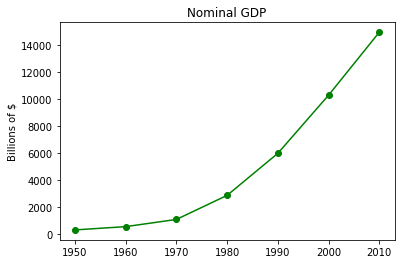

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

## Bar Charts

### Simple Bar Chart

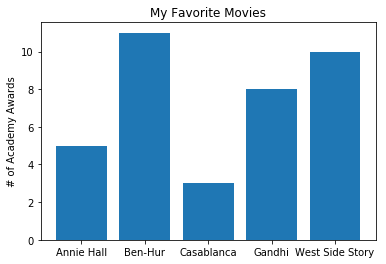

In [3]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
# plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
__ = plt.xticks(xs, movies)

### Histogram

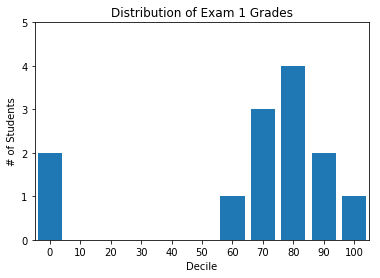

In [4]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

#plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
plt.bar(list(histogram),
        histogram.values(),                # give each bar its correct height
        8)                                 # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")

### Misleading Y-axis

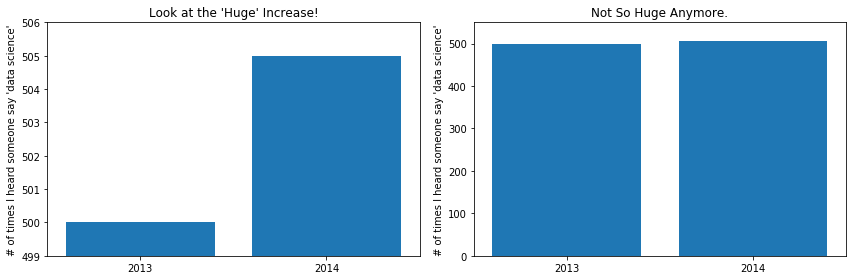

In [5]:
mentions = [500, 505]
years = [2013, 2014]

def plt_bar():
    #plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.bar(years, mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")
    
    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    # plt.ticklabel_format(useOffset=False)
    
plt.figure(figsize=nbhelper.double_x_size())

# misleading y-axis only shows the part above 500
plt.subplot(121) # In 1x2 subplot matrix, use Cell 1 (121).
plt_bar()
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")

plt.subplot(122) # In 1x2 subplot matrix, use Cell 2 (122).
plt_bar()
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore.")

plt.tight_layout() # Prevent overlapping subplots

## Line Charts

### Several Line Charts

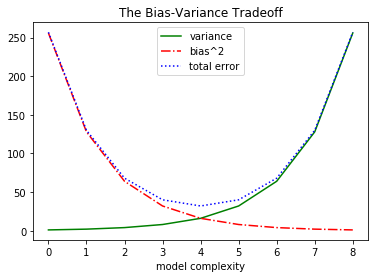

In [6]:
variance     = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]

xs = range(len(variance))

# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")

## Scatterplots

### Scatterplot

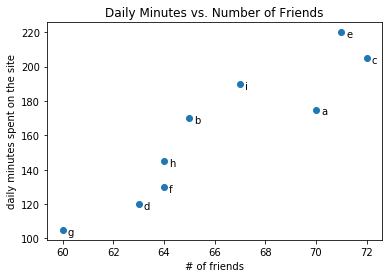

In [7]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")

### Scatterplot Axes

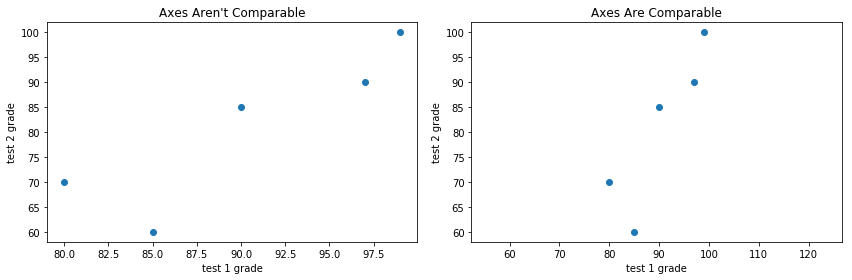

In [8]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

def plt_scatter():
    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")
    
plt.figure(figsize=nbhelper.double_x_size())

plt.subplot(121)
plt_scatter()
plt.title("Axes Aren't Comparable")

plt.subplot(122)
plt_scatter()
plt.title("Axes Are Comparable")
plt.axis("equal")

plt.tight_layout()

## Pie Chart

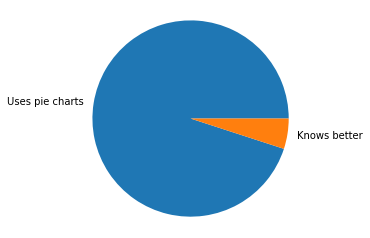

In [9]:
plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])

# make sure pie is a circle and not an oval
__ =plt.axis("equal")